In [1]:
import torch
from torch import nn

import math 
import matplotlib.pyplot as plt

from ganpy import GAN
from IPython.display import clear_output

In [2]:
torch.manual_seed(111)

### Preparing training data

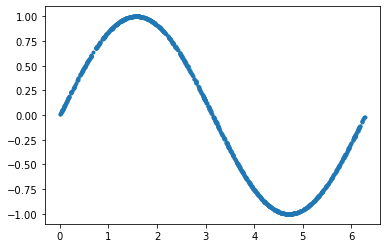

In [3]:
train_data_length = 1024

train_data      = torch.zeros((train_data_length,2))
train_data[:,0] = 2* math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels    = torch.zeros(train_data_length)

train_set = [
    (train_data[i],train_labels[i]) for i in range(train_data_length)
]

plt.plot(train_data[:, 0], train_data[:, 1], ".")

### Data loader

In [4]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

### Discriminator

In [5]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,1),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        output = self.model(x)
        return output

disc = Discriminator()

### Generator

In [6]:
class Generator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,2)
        )
    
    def forward(self,x):
        output = self.model(x)
        return output

gen = Generator()

In [7]:

gan = GAN(disc,gen)

Using CPU


### Learning parameters


In [8]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

gan.setParams(lr,num_epochs,loss_function)

### Optimizers


In [9]:
gan.prepareOptimizer()

### Training

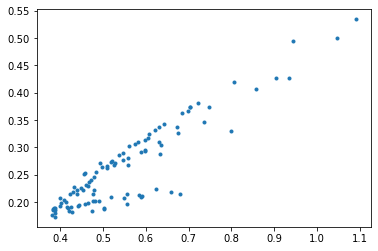

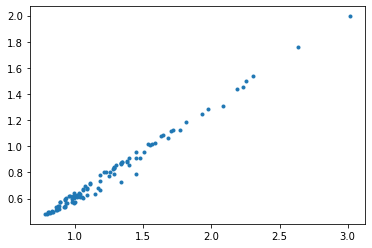

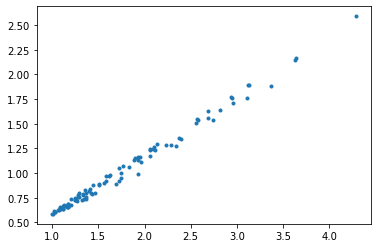

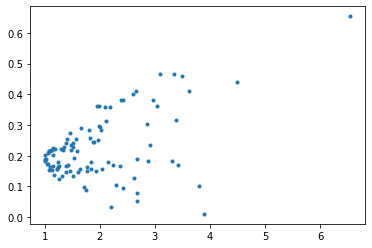

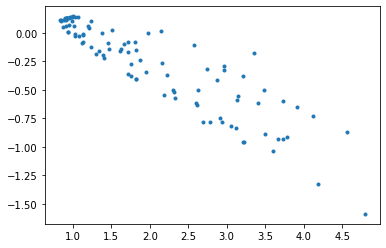

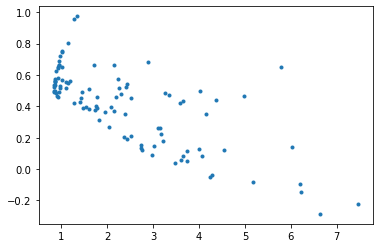

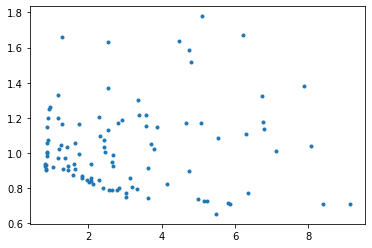

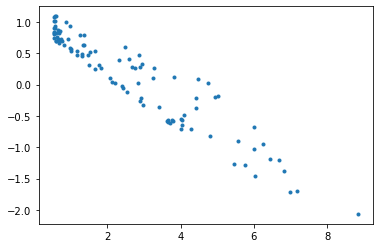

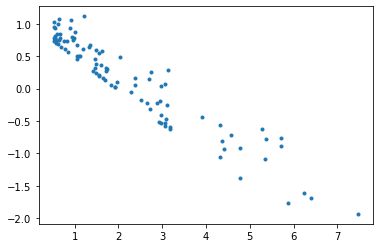

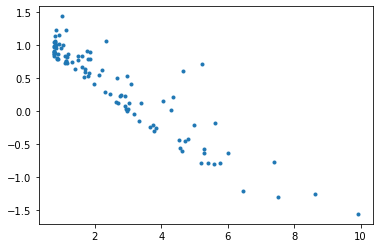

In [10]:
gan.prepareTrainSet(batch_size,train_set)

while not gan.finished():
    results = gan.trainStep()
    plt.figure(1)
    plt.clf()
    plt.plot(results[:, 0], results[:, 1], ".")
    plt.show()

print("DONE")      

### Testing results

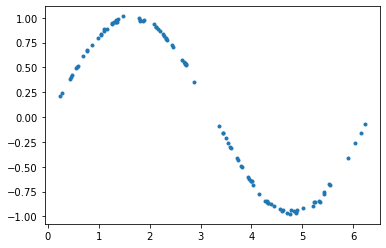

In [ ]:
generated_samples = gan.generate()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
z